# HW4 

Submitter: Yoav_Furer_204613475_Maayan Paz-Chen_204577910

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Read data

In [2]:
bank = pd.read_csv('bank-full.csv')
heart = pd.read_csv('heart_2020_cleaned.csv')

#step 1: find which column fits for generalization

In [3]:
def find_col(dt):
    dic = {}
    for col in dt.columns:
        dic.update({col : dt[col].unique().size})
    dic = sorted(dic.items(), key=lambda x: x[1],reverse=True)
    return dic[0] #returning the column with highest number of unique values
    

# Finding the k-anonimity


In [4]:
def find_k_anonimity(df):
    k =  df.groupby(df.columns.tolist(),as_index=False).size()['size'].min()
    return k 

In [5]:
# Validation- Method to calculate number of rows in each group(=identical rows) and and write to csv. 

def CalclateHowManyRowsContainEachGroup(df):
    
    x= df.value_counts().reset_index(name='counts')
    x.to_csv("new.csv")
    
    #print how many rows included in each group
    print(x.groupby('counts')['counts'].sum())
    total = x['counts'].sum()
    print(total)

# Perform Linear Regression

step 5: linear regression and announce mse

In [6]:
# https://pbpython.com/categorical-encoding.html

def prepareToLinearReg(df):
    
    dt = df
    dt[dt.select_dtypes(['object']).columns] = dt.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#     print(dt.dtypes)
    
    for col in dt:
        if(dt[col].dtypes == 'category'):
            dt[col] = dt[col].cat.codes
#             dt[col] = dt[col].apply(lambda x: x.cat.codes)

    return dt

In [7]:
def predict(x_train,y_train,x_test,y_test):
    
    poly_features = PolynomialFeatures(degree=1, include_bias=False)

    X_transform = poly_features.fit_transform(x_train)

    model = LinearRegression()
    model.fit(X_transform, y_train)  # Fit the model

    X_test_transform = poly_features.fit_transform(x_test)
    y_pred = model.predict(X_test_transform)

    # Error analysis
    sqerr = (y_test - y_pred) ** 2
    mse = np.mean(sqerr)
    
    return mse

In [8]:
def linearReg(x_train,y_train,x_test,y_test):
    
    x_train = prepareToLinearReg(x_train)
    x_test = prepareToLinearReg(x_test)
    mse = predict(x_train,y_train,x_test,y_test)
    return mse

# Bank data

Split data to train set and test set. anonimize the train, build the model and use the rest that is not anonimize for test

In [9]:
#The objective is to predict next month default (binary)
y = bank.pop('default')
y = y.replace({"yes": 1, "no": 0})

In [10]:
offset = int(bank.shape[0] * 0.9)  # taking 90% for training, the rest for testing
bank_x_train, bank_y_train = bank[:offset], y[:offset]
bank_x_test, bank_y_test = bank[offset:], y[offset:]

In [11]:
def BankGenralization(df,numberOfColToAnoni):
    
    temp_df = df.copy(deep=False)
    
    for i in range(0,numberOfColToAnoni):   
        col= find_col(temp_df)[0]
#         print(col)
        temp_df.pop(col)
        if(col == 'pdays'):
            df['pdays'] = df['pdays'].apply(lambda pdays: 1 if pdays != -1 else pdays)
        elif(col == 'balance'):
            df['balance'] = df['balance'].apply(lambda balance: 'positive' if balance >= 0 else 'negative')
        elif(col == 'duration'):
            df['duration'] = df['duration'].apply(lambda duration: 'long' if duration >= 180 else 'short')
        elif(col == 'age'):
            df['age'] = df['age'].apply(lambda age: 'old' if age >= 40 else 'young')    
        elif(col == 'day'):
            df['day'] = df['day'].apply(lambda day: 1 if day >= 15.8 else 0)
        elif(col == 'contact'):
            df['contact'] = df['contact'].apply(lambda contact: 'unknown' if contact == 'unknown' else 'known')
        elif(col == 'marital'):
            df['marital'] = df['marital'].apply(lambda marital: 'married' if marital == 'married' else 'not married')
        elif(col == 'job'):
            df['job'] = df['job'].apply(lambda job:'no job' if job in ['unknown','retired','unemployed','student']  else 'has job')
        elif(col =='education'):
            df['education'] = df['education'].apply(lambda education:  1 if education == 'tertiary'  else 0)
        elif(col == 'campaign'):
            df['campaign'] = df['campaign'].apply(lambda campaign:'one' if campaign >=2  else 'some')
        elif(col == 'previous'):
            df['previous'] = df['previous'].apply(lambda previous:'none' if previous ==0  else 'some')
        elif(col == 'month'):
            df['month'] = df['month'].apply(lambda month: 0  if month in['jan','feb','mar','apr','may','jun']  else 1)
        elif(col == 'poutcome'):
            df['poutcome'] = df['poutcome'].apply(lambda poutcome:poutcome if poutcome =='success'  else 'failed')

            
    return df

Learn the columns histogram

In [12]:
print(bank_x_train.shape)

(40689, 16)


In [13]:
print(bank['duration'].describe())
print(bank['job'].describe())
# bank['job'].value_counts().reset_index(name='counts')
print(bank['age'].describe())
print(bank['balance'].describe())
print(bank['pdays'].describe())
print(bank['day'].describe())
# print(bank['day'].value_counts())
print(bank['day'].mean())
# bank['month'].value_counts().reset_index(name='counts')

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64
count    45211.000000
mean        15.806419
std          8.3

# Bank Execution

Loop by columns. Each time anonimize i number of columns. calculate k. if k increase - performe linear regression and find the MSE. 

In [14]:
max_k = 0
bank_msePerKDict={}

for i in range(1,len(bank_x_train.columns)):
    df = bank_x_train.copy(deep=False)
    anonimiTrain = BankGenralization(df,i)
    current_k = find_k_anonimity(anonimiTrain)
    print("the k-annonimity is:",current_k)
    if(current_k > max_k):
        mse = linearReg(anonimiTrain,bank_y_train,bank_x_test,bank_y_test)
        print("MSE: {0} , RMSE: {1} current_k: {2}".format(mse,np.sqrt(mse),current_k))
        max_k = current_k
        bank_msePerKDict[max_k] = mse

the k-annonimity is: 1


C:\Users\mpazchen\AppData\Local\Temp\ipykernel_26060\1716443545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[dt.select_dtypes(['object']).columns] = dt.select_dtypes(['object']).apply(lambda x: x.astype('category'))
C:\Users\mpazchen\AppData\Local\Temp\ipykernel_26060\1716443545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[col] = dt[col].cat.codes


MSE: 220621.817806807 , RMSE: 469.70396826810713 current_k: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1


# Heart Data

In [15]:
#The objective is to predict heart disease
y = heart.pop('HeartDisease')
y = y.replace({"Yes": 1, "No": 0})

In [16]:
offset = int(heart.shape[0] * 0.9)  # taking 90% for training, the rest for testing
heart_x_train, heart_y_train = heart[:offset], y[:offset]
heart_x_test, heart_y_test = heart[offset:], y[offset:]

In [17]:
def HeartGenralization(df,numberOfColToAnoni):
    
    temp_df = df.copy(deep=False)
    
    for i in range(0,numberOfColToAnoni):   
        col= find_col(temp_df)[0]
#         print(col)
        temp_df.pop(col)
        if(col == 'SleepTime'):
            df['SleepTime'] = df['SleepTime'].apply(lambda SleepTime: 1 if SleepTime >=7 else 0)
        elif(col == 'GenHealth'):
            df['GenHealth'] = df['GenHealth'].apply(lambda GenHealth: 'not good' if GenHealth == 'Fair' or GenHealth =='Poor' else 'good and better')
        elif(col == 'Race'):
            df['Race'] = df['Race'].apply(lambda Race:'white' if Race=='White' else 'not white')
        elif(col == 'AgeCategory'):
            df['AgeCategory'] = df['AgeCategory'].apply(lambda AgeCategory: '1' if AgeCategory in['65-69','60-64','70-74','55-59','50-54'] else '0')    
        elif(col == 'MentalHealth'):
            df['MentalHealth'] = df['MentalHealth'].apply(lambda MentalHealth: 1 if MentalHealth >0 else 0)
        elif(col == 'PhysicalHealth'):
            df['PhysicalHealth'] = df['PhysicalHealth'].apply(lambda PhysicalHealth:1 if PhysicalHealth>=27.34 else 0)
        elif(col == 'BMI'):
            df['BMI'] = df['BMI'].apply(lambda BMI:'normal BMI' if BMI>18.4 and BMI<24.9 else 'not normal')
            
    return df

Investigate heart columns

In [18]:
print(heart_x_train.shape)

(287815, 17)


In [19]:
heart_x_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287810,31.25,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Excellent,7.0,Yes,No,No
287811,30.81,Yes,No,No,2.0,4.0,No,Male,40-44,White,No,No,Good,12.0,No,No,No
287812,26.61,Yes,No,No,0.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
287813,28.25,Yes,No,No,0.0,10.0,No,Male,60-64,White,No,Yes,Very good,8.0,No,No,No


In [20]:
print("SleepTime",heart['SleepTime'].describe())
# # bank['duration'].hist()

print("GenHealth",heart['GenHealth'].describe())
# bank['job'].value_counts().reset_index(name='counts')

print("Race",heart['Race'].describe())


print("AgeCategory",heart['AgeCategory'].describe())
print(heart['AgeCategory'].value_counts())

print("MentalHealth",heart['MentalHealth'].describe())

print("PhysicalHealth", heart['PhysicalHealth'].describe())

print("BMI",heart['BMI'].describe())
# print(heart['BMI'].hist())
print(heart['BMI'].mean())

SleepTime count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64
GenHealth count        319795
unique            5
top       Very good
freq         113858
Name: GenHealth, dtype: object
Race count     319795
unique         6
top        White
freq      245212
Name: Race, dtype: object
AgeCategory count     319795
unique        13
top        65-69
freq       34151
Name: AgeCategory, dtype: object
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
MentalHealth count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%     

# Heart Execution

Loop by columns. Each time anonimize i number of columns. calculate k. if k increase - performe linear regression and find the MSE. 

In [21]:
max_k = 0
heart_msePerKDict={}

for i in range(1,len(heart_x_train.columns)):
    df = heart_x_train.copy(deep=False)
    anonimiTrain = HeartGenralization(df,i)
    current_k = find_k_anonimity(anonimiTrain)
    print("the k-annonimity is:",current_k)
    if(current_k > max_k):
        mse = linearReg(anonimiTrain,heart_y_train,heart_x_test,heart_y_test)
        print("MSE: {0} , RMSE: {1} current_k: {2}".format(mse,np.sqrt(mse),current_k))
        max_k = current_k
        heart_msePerKDict[max_k] = mse
        
# find_k_anonimity2(heart_x_train)        

the k-annonimity is: 1


C:\Users\mpazchen\AppData\Local\Temp\ipykernel_26060\1716443545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[dt.select_dtypes(['object']).columns] = dt.select_dtypes(['object']).apply(lambda x: x.astype('category'))
C:\Users\mpazchen\AppData\Local\Temp\ipykernel_26060\1716443545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[col] = dt[col].cat.codes


MSE: 0.06975988653677616 , RMSE: 0.26412096951354724 current_k: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1
the k-annonimity is: 1


# Draw MSE by K

In [22]:
df1 = pd.DataFrame(heart_msePerKDict.items(), columns=['K', 'MSE'])
# print(df1)
df2 = pd.DataFrame(bank_msePerKDict.items(), columns=['K', 'MSE'])
# print(df2)
df1['Data']='heart'
df2['Data']='bank'

C:\Users\mpazchen\AppData\Local\Temp\ipykernel_26060\904875836.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sns.scatterplot(x='K', y='MSE', hue='Data', data=df1.append(df2), palette=['Red', 'Blue'])


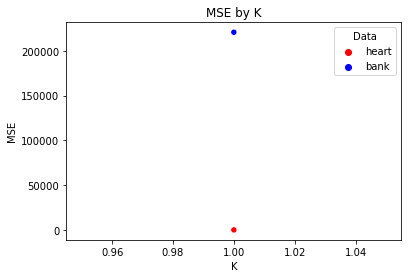

In [23]:
sns.scatterplot(x='K', y='MSE', hue='Data', data=df1.append(df2), palette=['Red', 'Blue'])
plt.title('MSE by K')
plt.show()